In [1]:
import sklearn.datasets
import numpy as np

# Loading the dataset

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
X = breast_cancer.data
y = breast_cancer.target

In [4]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(X.shape, y.shape)

(569, 30) (569,)


In [6]:
import pandas as pd

In [7]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [8]:
data["class"] = breast_cancer.target

In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print(data["class"].value_counts())

1    357
0    212
Name: class, dtype: int64


In [11]:
print(breast_cancer.target_names)

['malignant' 'benign']


# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop("class", axis = 1)
y = data["class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 42)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


In [16]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


# Perceptron

In [17]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [18]:
X_train = X_train.values
X_test = X_test.values

In [19]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    y = []
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.array(y)

  def fit(self, X, y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0

    for i in range(epochs):
      for x, y_ in zip(X, y):
        y_pred = self.model(x)
        if y_ == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y_ == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1

      accuracy[i] = accuracy_score(self.predict(X), y)
      if max_accuracy < accuracy[i]:
        max_accuracy = accuracy[i]
        checkptw = self.w
        checkptb = self.b

    self.w = checkptw
    self.b = checkptb
    print(max_accuracy)
  
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.show()

In [20]:
perceptron = Perceptron()

0.935546875


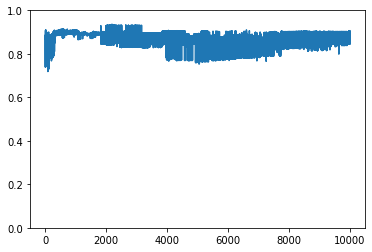

In [21]:
perceptron.fit(X_train, y_train, 10000, 0.01)

In [22]:
y_pred_train = perceptron.predict(X_train)
print(accuracy_score(y_pred_train, y_train))

0.935546875


In [23]:
y_pred_test = perceptron.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8421052631578947
